<font color="blue" size=5><b>Simple Linear Regression</b></font>

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('placement.csv')

In [8]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


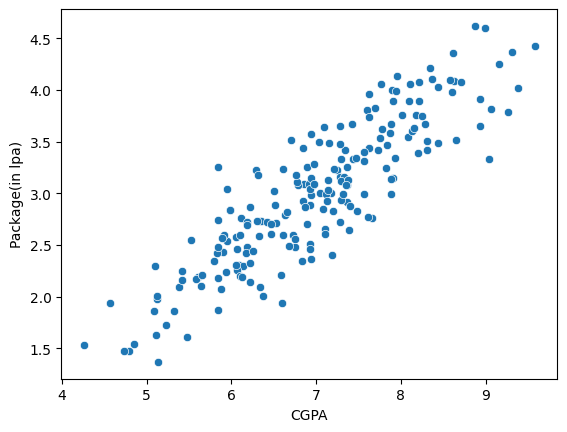

In [9]:
sns.scatterplot(data=df, x='cgpa', y='package')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')
plt.show()


In [10]:
# input and output features
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [13]:
lr.fit(X_train,y_train)

LinearRegression()

In [14]:
# checking the calculated parameters
lr.coef_, lr.intercept_

(array([0.55795197]), -0.8961119222429144)

In [15]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [16]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [17]:
lr.predict(X_test.iloc[0].values.reshape(1,1))
# for x = 8.58, y = 4.10 (predicted value is 3.89)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

In [18]:
lr.predict(X_test)

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [19]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

Text(0, 0.5, 'Package(in lpa)')

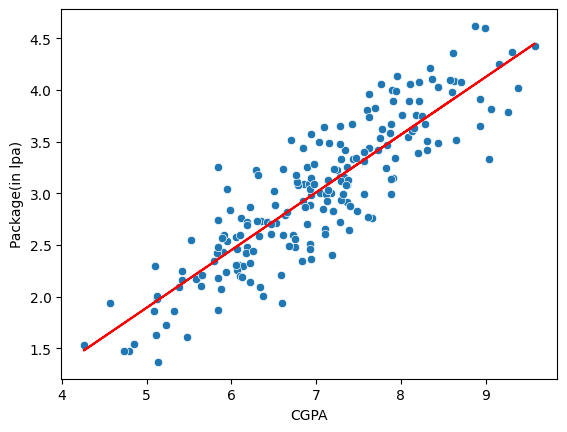

In [20]:
sns.scatterplot(data = df, x='cgpa', y='package')
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
y_pred = lr.predict(X_test)


In [22]:
print("MAE ", mean_absolute_error(y_test,y_pred))
# unit is same as LPA

MAE  0.2884710931878175


In [23]:
print("MSE ", mean_squared_error(y_test,y_pred))
# unit is same as LPA*LPA

MSE  0.12129235313495527


In [24]:
print("RMSE ", np.sqrt(mean_squared_error(y_test,y_pred)))
# unit is same as LPA

RMSE  0.34827051717731616


In [25]:
print("R2 ", r2_score(y_test,y_pred))
# CGPA explains 78% of the variance

R2  0.780730147510384


In [28]:
# calculating adjusted R2 square
n = len(y_test) # number of rows
p = X.shape[1]  # number of features
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R2 ", adjusted_r2)

Adjusted R2  0.7749598882343415
